In [1]:
import os

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

pd.set_option('display.max_columns', 999)
pd.set_option('display.max_rows', 999)


# reading the data

In [2]:
project_path = 'C:\\Users\\a\\PycharmProjects\\interview'
data_path = os.path.join(project_path, 'data', 'bank-additional-full.csv')
print(data_path)


C:\Users\a\PycharmProjects\interview\data\bank-additional-full.csv


In [3]:
df = pd.read_csv(data_path, sep=';')
df.head()


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
data = df.drop('y', axis=1)
label = df['y']


In [5]:
data.shape


(41188, 20)

# understanding the problem type

<AxesSubplot:>

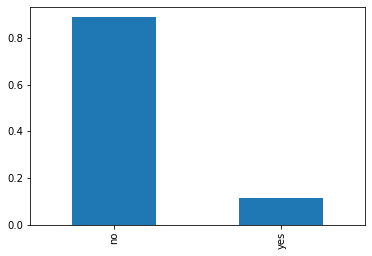

In [6]:
label.value_counts(normalize=True).plot.bar()


This is an unbalanced class clasification.

# Understanding the Data

### Check for Duplicate Records

In [7]:
df = df.drop_duplicates(ignore_index=True)
df.shape


(41176, 21)

12 records  found duplicate

### understanding catagorical variables

In [8]:
data_types = data.dtypes
cat_columns = list(data_types[data_types == 'object'].index)
l = [data[col].value_counts(normalize=True).sort_values(ascending=False) for col in cat_columns]
l = pd.concat([pd.DataFrame({'counts': col.values, 'column': col.name, 'categories': col.index}) for col in l])
l = l.set_index(['column', 'categories'])
l


counts
column      categories                   
job         admin.               0.253035
            blue-collar          0.224677
            technician           0.163713
            services             0.096363
            management           0.070992
            retired              0.041760
            entrepreneur         0.035350
            self-employed        0.034500
            housemaid            0.025736
            unemployed           0.024619
            student              0.021244
            unknown              0.008012
marital     married              0.605225
            single               0.280859
            divorced             0.111974
            unknown              0.001942
education   university.degree    0.295426
            high.school          0.231014
            basic.9y             0.146766
            professional.course  0.127294
            basic.4y             0.101389
            basic.6y             0.055647
            unknown              0.042027
            illiterate           0.000437
default     no                   0.791201
            unknown              0.208726
            yes                  0.000073
housing     yes                  0.523842
            no                   0.452122
            unknown              0.024036
loan        no                   0.824269
            yes                  0.151695
            unknown              0.024036
contact     cellular             0.634748
            telephone            0.365252
month       may                  0.334296
            jul                  0.174177
            aug                  0.149995
            jun                  0.129115
            nov                  0.099568
            apr                  0.063902
            oct                  0.017432
            sep                  0.013839
            mar                  0.013256
            dec                  0.004419
day_of_week thu                  0.209357
            mon                  0.206711
            wed                  0.197485
            tue                  0.196416
            fri                  0.190031
poutcome    nonexistent          0.863431
            failure              0.103234
            success              0.033335

In [9]:
len(cat_columns)

10

**Out come of above analysis:**
 
 1. Education: cand be treated as ordinal feature
   
 2. Some categories has Unknown(NAs), na % is less except in default
     * first try imputing them with mode them. 
     * keep the as its own category
        
        

# understanding numerical variables

In [10]:
num_columns = list(data_types[data_types != 'object'].index)


In [11]:
len(num_columns)

10

In [12]:
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [13]:
data[num_columns].nunique()

age                 78
duration          1544
campaign            42
pdays               27
previous             8
emp.var.rate        10
cons.price.idx      26
cons.conf.idx       26
euribor3m          316
nr.employed         11
dtype: int64

<AxesSubplot:ylabel='Frequency'>

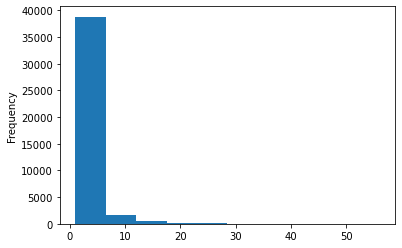

In [14]:
data['campaign'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

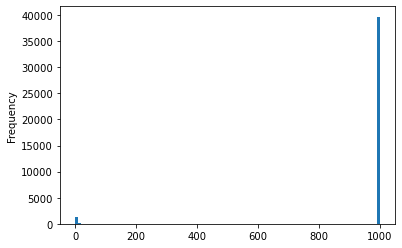

In [15]:
data['pdays'].plot.hist(bins=100)

<AxesSubplot:ylabel='Frequency'>

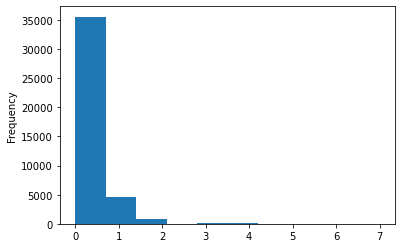

In [16]:
data['previous'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

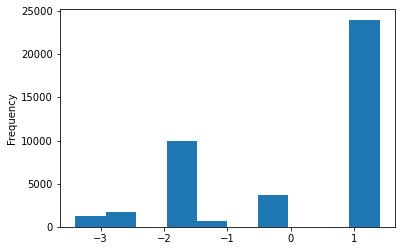

In [17]:
data['emp.var.rate'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

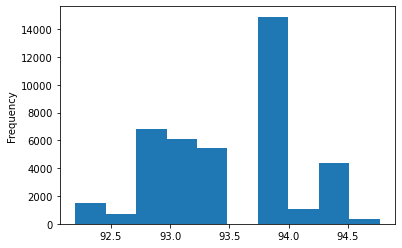

In [18]:
data['cons.price.idx'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

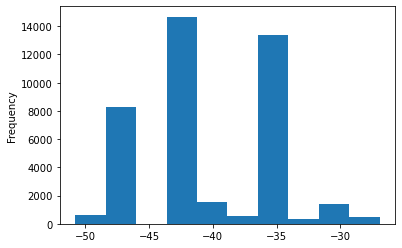

In [19]:
data['cons.conf.idx'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

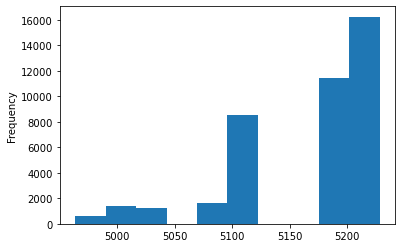

In [20]:
data['nr.employed'].plot.hist()

In [21]:
corr = df.corr()
corr.style.background_gradient()


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.000000,-0.000808,0.004622,-0.034381,0.024379,-0.000242,0.001009,0.129075,0.010852,-0.017607
duration,-0.000808,1.000000,-0.071765,-0.047556,0.020600,-0.027941,0.005303,-0.008126,-0.032861,-0.044672
campaign,0.004622,-0.071765,1.000000,0.052606,-0.079182,0.150786,0.127826,-0.013657,0.135169,0.144129
pdays,-0.034381,-0.047556,0.052606,1.000000,-0.587508,0.271063,0.078920,-0.091374,0.296946,0.372659
previous,0.024379,0.020600,-0.079182,-0.587508,1.000000,-0.420587,-0.203197,-0.050929,-0.454571,-0.501411
emp.var.rate,-0.000242,-0.027941,0.150786,0.271063,-0.420587,1.000000,0.775293,0.196257,0.972244,0.906949
cons.price.idx,0.001009,0.005303,0.127826,0.078920,-0.203197,0.775293,1.000000,0.059170,0.688180,0.521945
cons.conf.idx,0.129075,-0.008126,-0.013657,-0.091374,-0.050929,0.196257,0.059170,1.000000,0.277864,0.100679
euribor3m,0.010852,-0.032861,0.135169,0.296946,-0.454571,0.972244,0.688180,0.277864,1.000000,0.945146
nr.employed,-0.017607,-0.044672,0.144129,0.372659,-0.501411,0.906949,0.521945,0.100679,0.945146,1.000000


**out come of the above analysis**

 1. pdays has most of the value 999(na)
 2. some of the features are highly skewd.
 3. emp.var.rate, euribor3m and nr.employed are correlated features

# understand relationship between target and features

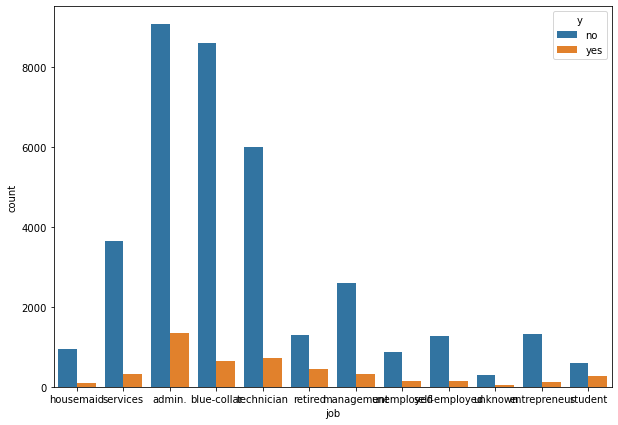

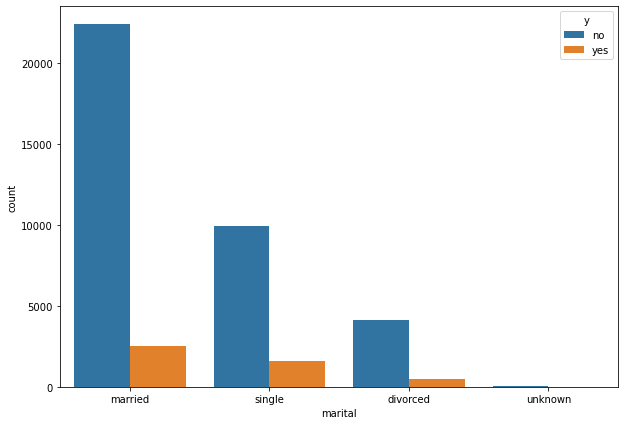

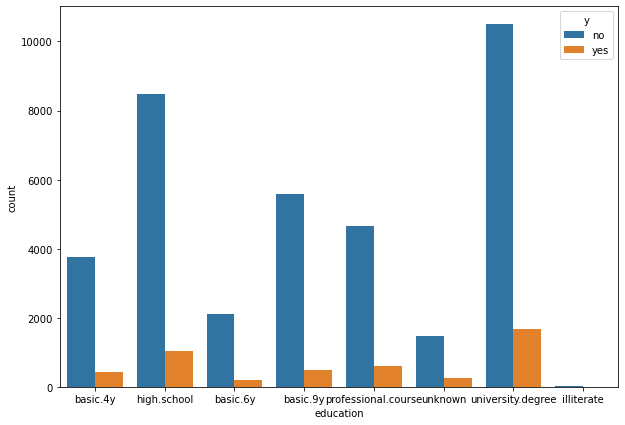

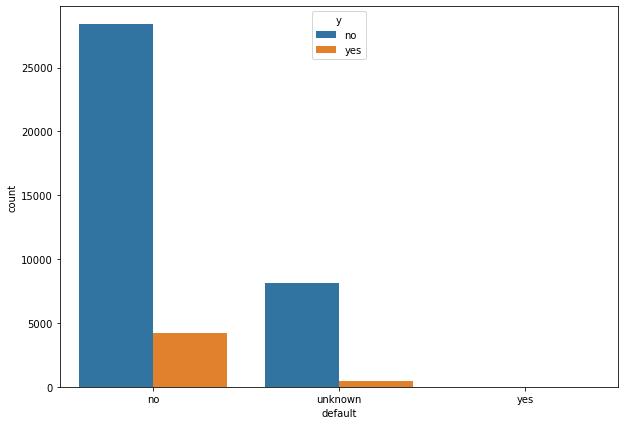

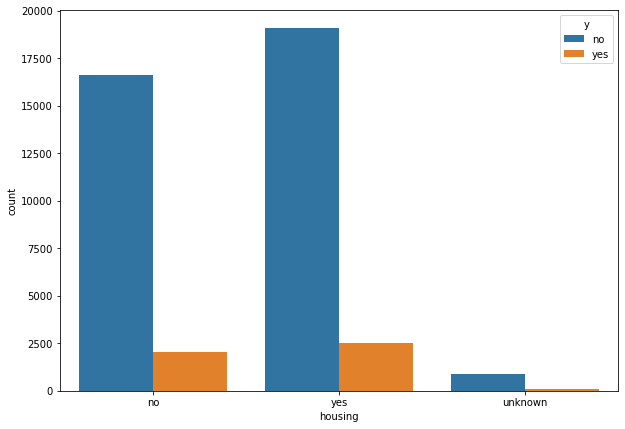

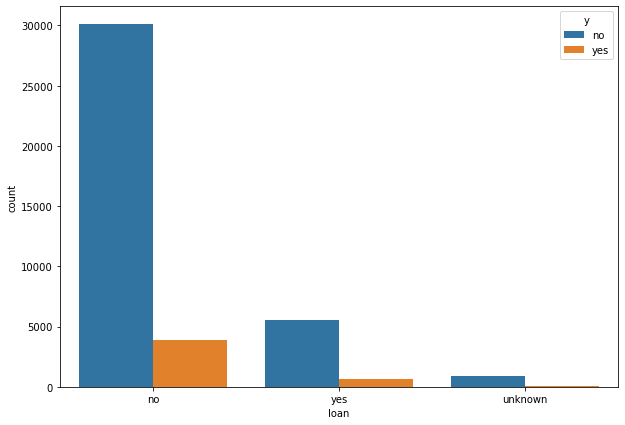

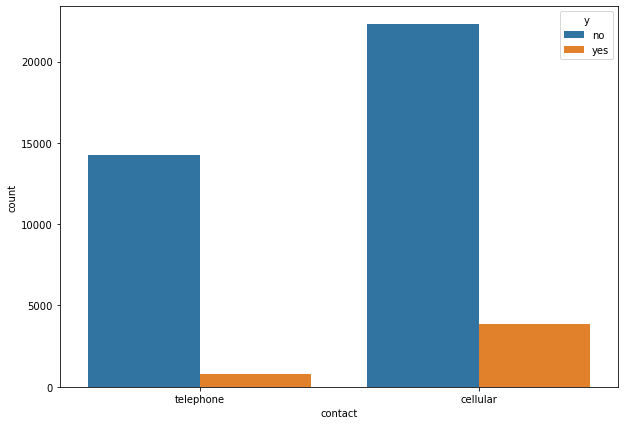

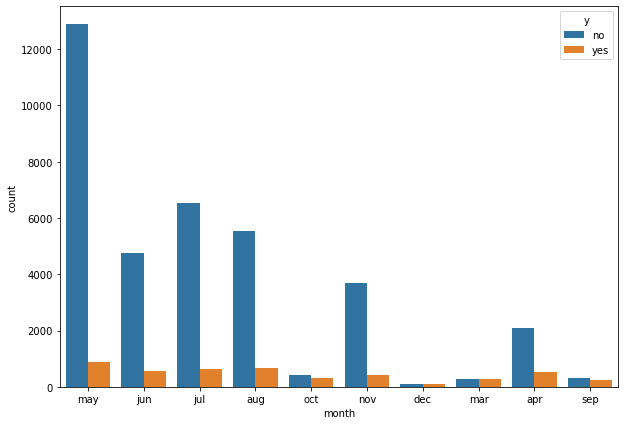

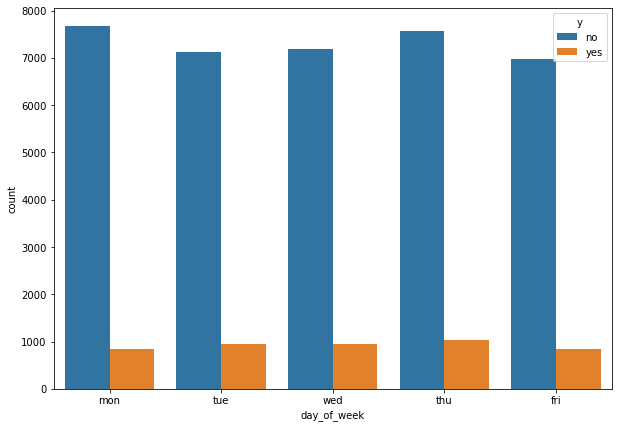

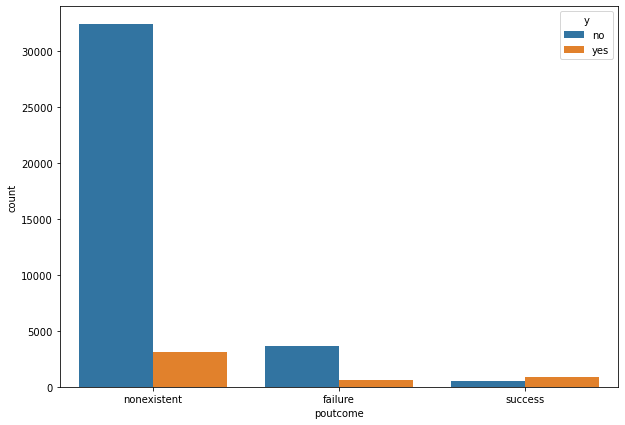

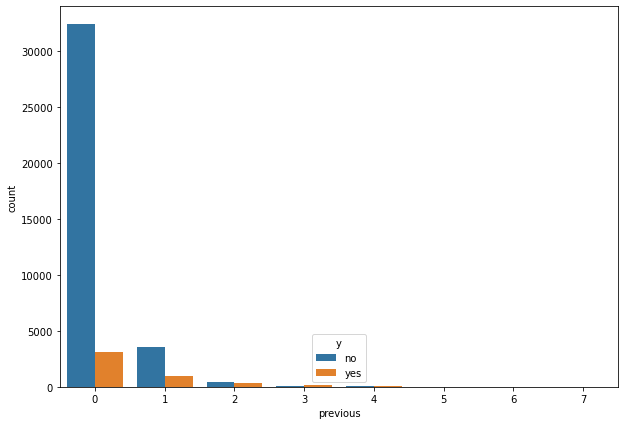

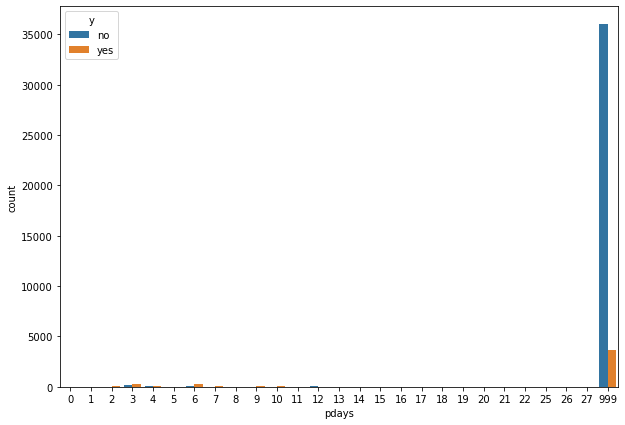

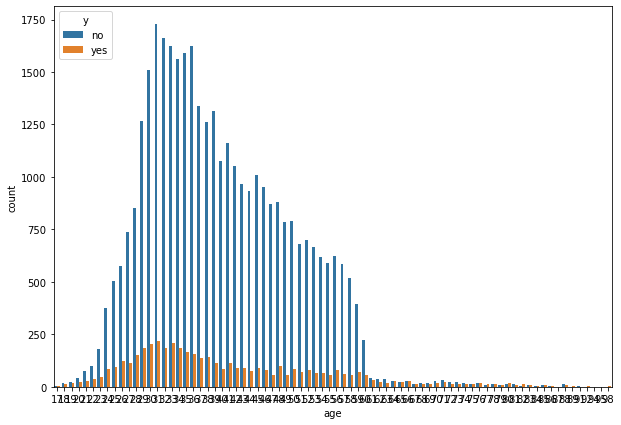

In [22]:
def bar_plot(col):
    plt.figure(figsize=(10, 7))
    sns.countplot(x=df[col], data=df, hue=df['y'])

cat_columns = cat_columns + ['previous', 'pdays', 'age']
for col in cat_columns:
    bar_plot(col)


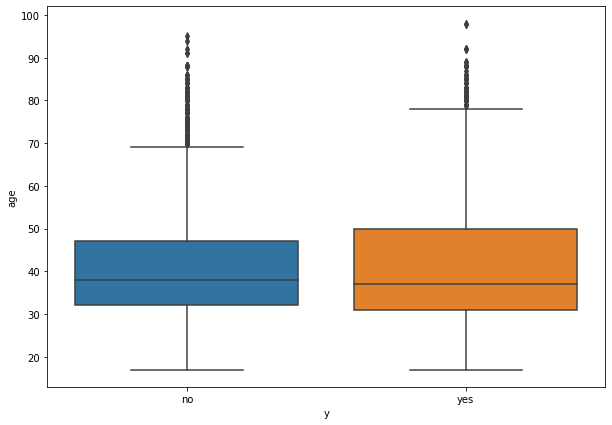

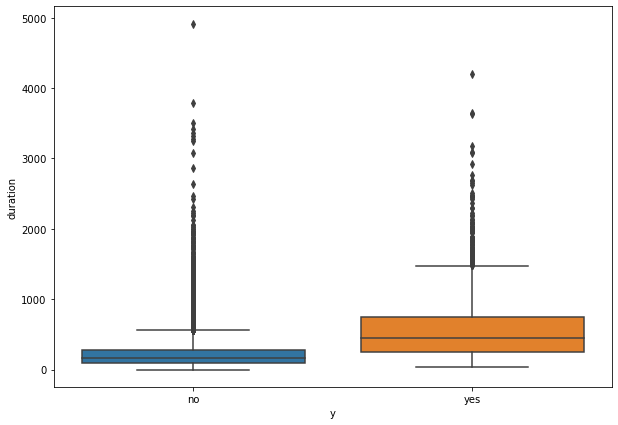

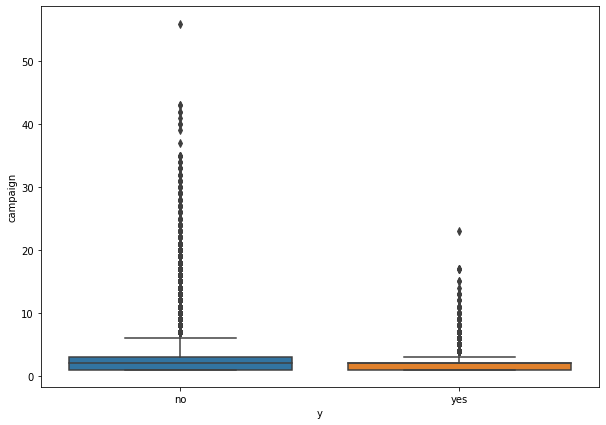

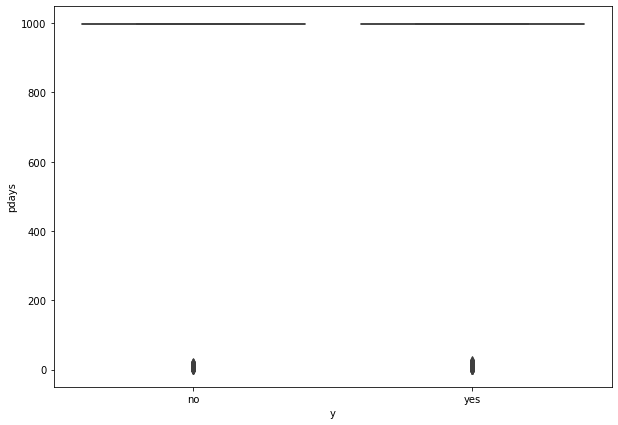

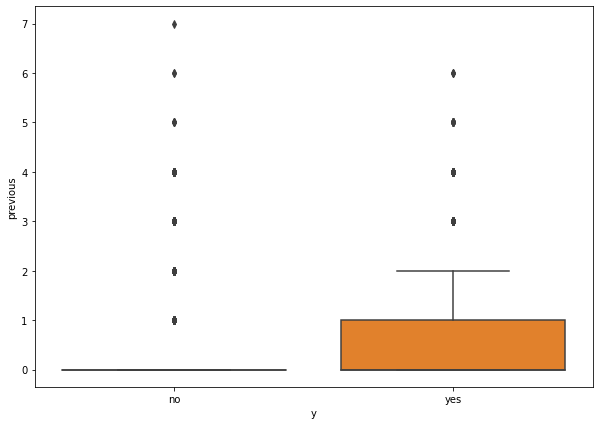

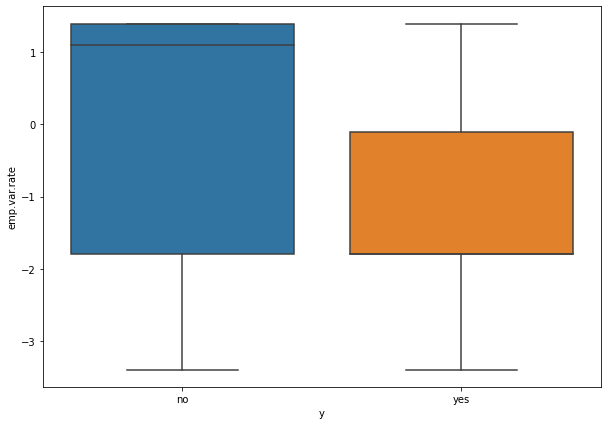

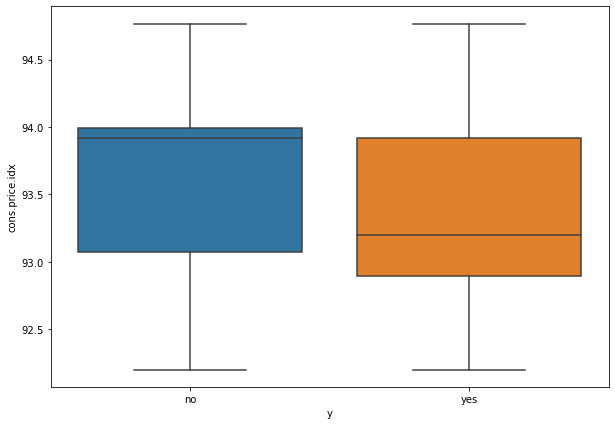

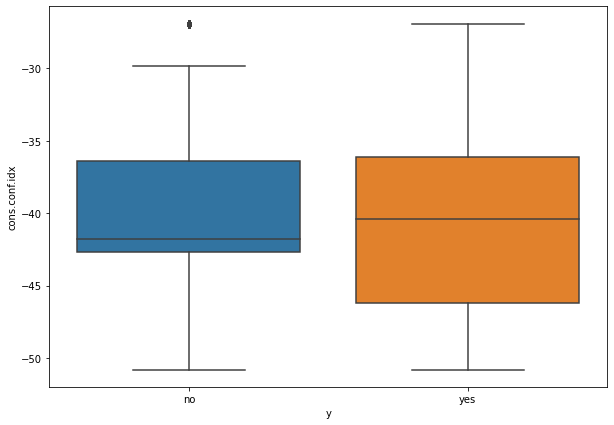

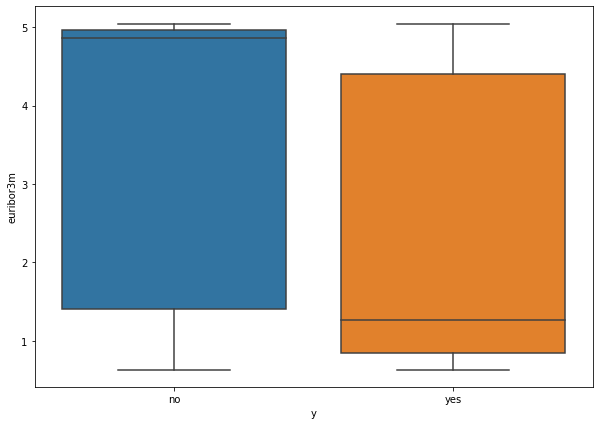

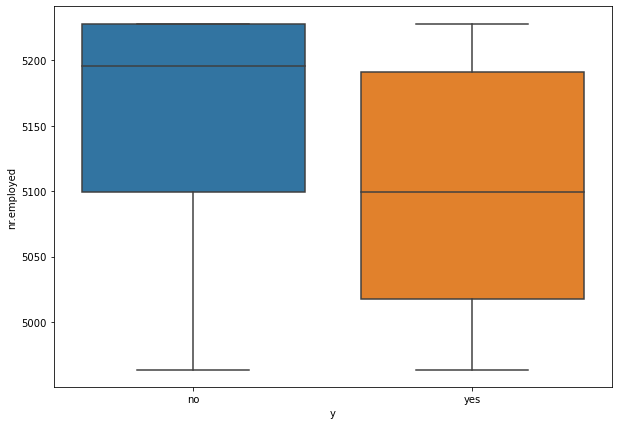

In [23]:
def box_plot(col):
    plt.figure(figsize=(10,7))
    sns.boxplot(x='y', y=col, data=df)
    
for col in num_columns:
    box_plot(col)

In [24]:
df[['marital', 'y', 'age']].groupby(['marital', 'y']).count()


age
marital  y         
divorced no    4135
         yes    476
married  no   22390
         yes   2531
single   no    9944
         yes   1620
unknown  no      68
         yes     12

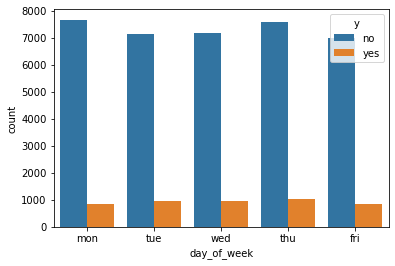

In [25]:
sns.countplot(x=df['day_of_week'], data=df, hue=df['y'])
plt.savefig("day_of_week.jpg", bbox_inches='tight', dpi=150)

In [26]:
dist_yes = df[df['y']=='yes']['nr.employed']
dist_no = df[df['y']=='no']['nr.employed']

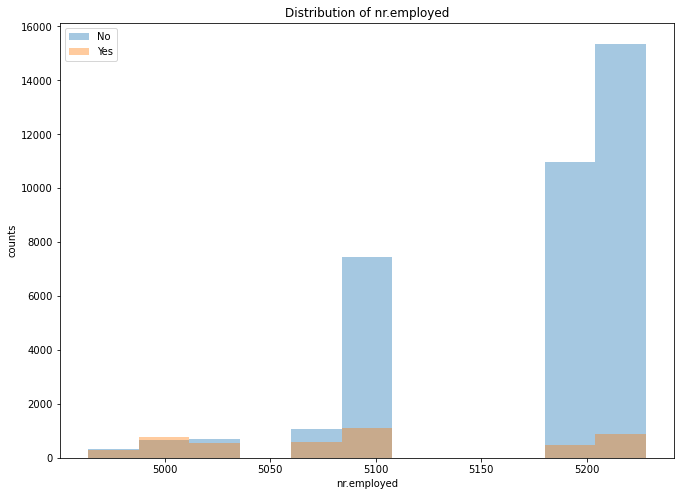

In [27]:
ax = plt.figure(figsize=(11,8)).gca()
bins = len(df['nr.employed'].unique())
sns.distplot(dist_no, kde=False, bins=bins, ax=ax, label="No")
sns.distplot(dist_yes, kde=False, bins=bins, ax=ax, label="Yes")
plt.title('Distribution of nr.employed')
plt.legend()
plt.ylabel("counts")
plt.savefig("nremployed.jpg", bbox_inches='tight', dpi=150)
plt.show()